In [1]:
import pandas as pd
# import ast
# import re
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import gridspec
%matplotlib inline

# something a warning told me to do?
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

# pd.set_option('display.max_rows', 500)
# pd.set_option('display.max_columns', 500)
# pd.set_option('display.max_colwidth', 100)
# pd.set_option('display.width', 150)


print("done")

done


In [2]:
import import_func as imp
import tags_work as tgs
import desc_vis as vis


full_filename = "../data/by_article_fulltext_020920.jl"


full_df = imp.init_df(full_filename, "full", genre="none", categories="all")

def output_plot(outfile):
    fig1 = plt.gcf()
    # plt.legend(loc='lower center', bbox_to_anchor=(0.5, -0.24), ncol=3, fontsize=20)
    plt.tick_params(labelsize=16)
    plt.show()
    plt.draw()
    fig1.savefig(outfile, dpi=100)

full_df.head(2)

,id,headline,tags,authors,date,time,text,bio,date_seq,month_seq,...,undergraduate,working_life,early_career,career_related_policy,author,n_posts_author,column1,column2,one_time,category
0,5842,how to handle the backwoods of biotechnology,"[tooling up, advice, graduate, postdoc, indust...",david g. jensen,1998-01-16,5:00 am,"byseveral years ago, i read an advertisement m...",[],473,25,...,no,no,no,no,david g. jensen,245,no,yes,no,advice
1,5843,the path of a c.v.,"[tooling up, advice, graduate, postdoc, indust...",david g. jensen,1998-02-12,0:00 am,byany scientists express frustration that they...,[],500,26,...,no,no,no,no,david g. jensen,245,no,yes,no,advice


In [10]:
no_tags = []
for i in range(len(full_df)):
    flag = "untagged"
    n_tags = 0
    for col in full_df.columns:
        if full_df.iloc[i][col] != "yes":
            continue
        else:
            n_tags+=1
            flag = "tagged"
    if n_tags > 1:
        flag = "multi"
    no_tags.append(flag)
full_df["no_tags"] = no_tags

In [11]:
no_tags.count("multi")/len(no_tags)

0.8753888979859178

In [14]:
categories = [
    "advice",
    "job market",
    "academic",
    "workplace diversity",
    "working life",
    "non-disciplinary",
    "postdoc",
    "graduate",
    "midcareer",
    "life and career balance",
    "industry",
    "career profiles",
    "government",
    "undergraduate",
    "early career",
    "career-related policy"
        ]
formal_labels = {}
        
new_categories = []
for cat in categories:
    cat_new = cat.replace(" ", "_").replace("-", "_")
    cat = cat[0].upper() + cat[1:]
    formal_labels[cat_new] = cat
    new_categories.append(cat_new)
categories = new_categories


colors = [
    "#000000",
    "#9D9D9D",
    "orange",
    "#BE2633",
    "#E06F8B",
    "#493C2B",
    "#A46422",
    "#EB8931",
    "#F7E26B",
    "#2F484E",
    "#44891A",
    "#A3CE27",
    "#1B2632",
    "#005784",
    "#31A2F2",
    "#B2DCEF"
]

brights = [
    "#EB8931",
    "#F7E26B",
    "#005784",
    "#BE2633",
    "green",
    "purple"
]

grays = [
    "#e6e6e6",
    "#cccccc",
    "#b3b3b3",
    "#a6a6a6",
    "#8c8c8c",
    "#737373",
    "#595959",
    "#404040",
    "#262626",
    "#0d0d0d",
    "#000000"
]

bold_cats = [
    "advice",
    "job_market",
    "academic",
    "non_disciplinary",
    "workplace_diversity",
    "working_life"]

In [10]:
full_vis = vis.prep_per(full_df, group_by = "year", color = "red", test = False)

In [11]:
# Number of tags per post over time

n_tags = []

for i in range(len(full_df)):
    tags = full_df.iloc[i]["tags"]
    n_tags.append(len(tags))

full_df["n_tags"] = n_tags

tags_avg_df = full_df.groupby("year").mean()
tags_avg_df = tags_avg_df.reset_index()

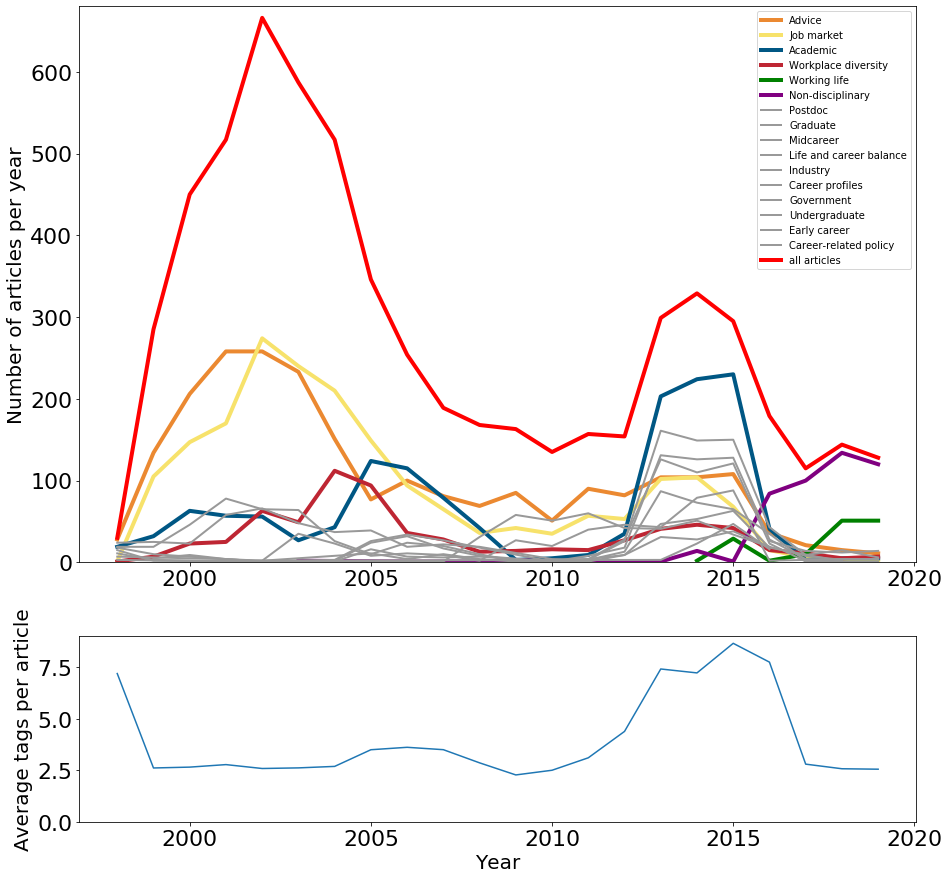

In [15]:
# gs = gridspec.GridSpec(2, 1, height_ratios=[3, 1])
fig, (ax0,ax1) = plt.subplots(2, 1, gridspec_kw={'height_ratios': [3, 1]})

# colors = ["black","green","orange","blue","purple","yellow","brown",]

# plots = []
count=0
b_count = 0
g_count = 0

for cat in categories:
    if cat in bold_cats:
        boldness=4
        col = brights[b_count]
        b_count+=1
    else:
        boldness=2
        # col = grays[g_count]
        col = "#999999"
        g_count+=1
    cat_df = full_df[full_df[cat] == "yes"]
    cat_vis = vis.prep_per(cat_df, group_by = "year")
    sns.lineplot(
        x = "year", y = "n", color = col,
        legend="full", label=formal_labels[cat],
        linewidth=boldness,
        data = cat_vis,
        ax=ax0)
    count+=1

sns.lineplot(x = "year", y = "n", color = "red", legend="full",linewidth=4, label="all articles",data = full_vis, ax=ax0)
ax0.set_ylim([0,680])
ax0.set_ylabel("Number of articles per year", fontsize=20)
ax0.set_xlabel("")
# ax0.set_xticks()
# plt.title("Category articles by year over time")

sns.lineplot(x = "year", y = "n_tags", data = tags_avg_df, ax=ax1)
ax1.set_ylim([0,9])
ax1.set_ylabel("Average tags per article", fontsize=20)
ax1.set_xlabel("Year", fontsize=20)

ax0.tick_params(axis='both', which='major', labelsize=22)
ax1.tick_params(axis='both', which='major', labelsize=22)



fig.set_figheight(15)
fig.set_figwidth(15)

# output_plot("../figs/article_types_expanded.png")
plt.savefig("../figs/article_types_expanded.png", bbox_inches="tight")